In [1]:
library(dviz.supp)
library(tidyr)
library(ggridges)

Loading required package: cowplot

Loading required package: colorspace

Loading required package: colorblindr

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dviz.supp’


The following objects are masked from ‘package:cowplot’:

    plot_grid, stamp, stamp_bad, stamp_good, stamp_ugly, stamp_wrong


The following object is masked from ‘package:datasets’:

    CO2



Attaching package: ‘ggridges’


The following object is masked from ‘package:dviz.supp’:

    Aus_athletes




In [3]:
cows %>% 
  mutate(breed = as.character(breed)) %>%
  filter(breed != "Canadian") -> cows_filtered

# compute densities for sepal lengths
cows_dens <- group_by(cows_filtered, breed) %>%
  do(ggplot2:::compute_density(.$butterfat, NULL)) %>%
  rename(butterfat = x)

# get the maximum values
cows_max <- filter(cows_dens, density == max(density)) %>%
  ungroup() %>%
  mutate(
    hjust = c(0, 0, 0, 0),
    vjust = c(0, 0, 0, 0),
    nudge_x = c(-0.2, -0.2, 0.1, 0.23),
    nudge_y = c(0.03, 0.03, -0.2, -0.06) 
  )

head(cows_dens)

breed,butterfat,density,scaled,ndensity,count,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Ayrshire,3.143087,0.001751031,0.001353519,0.001353519,0.03502063,20
Ayrshire,3.146382,0.001891994,0.001462481,0.001462481,0.03783988,20
Ayrshire,3.149677,0.002041196,0.001577812,0.001577812,0.04082393,20
Ayrshire,3.152972,0.002198363,0.001699299,0.001699299,0.04396725,20
Ayrshire,3.156267,0.002371426,0.001833074,0.001833074,0.04742852,20
Ayrshire,3.159562,0.002551829,0.001972523,0.001972523,0.05103657,20


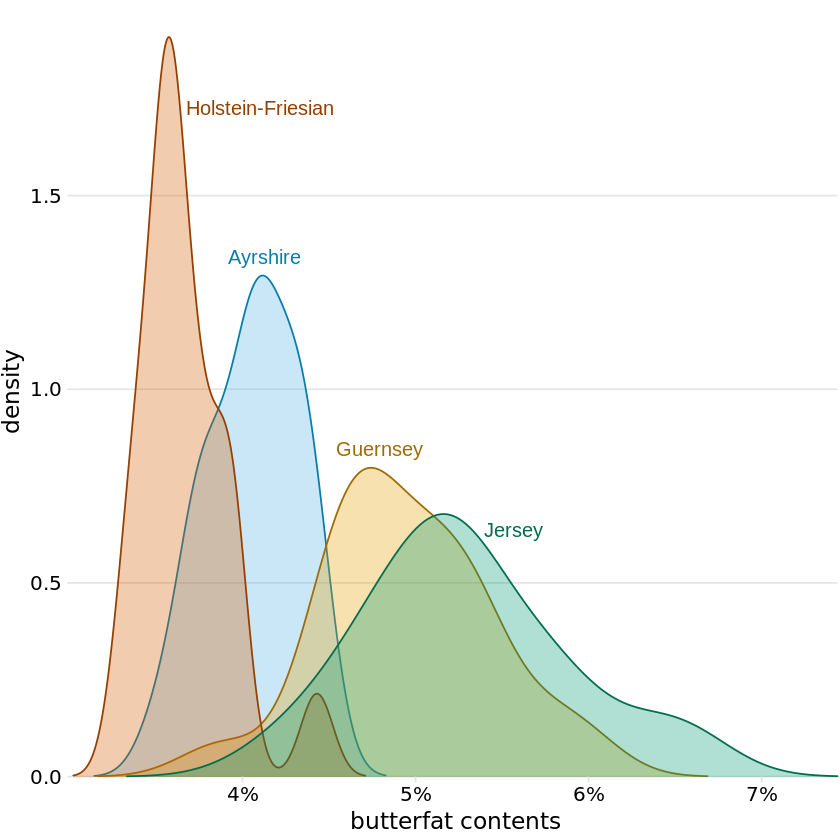

In [2]:


cows_p <- ggplot(cows_dens, aes(x = butterfat, y = density, color = breed, fill = breed)) + 
  geom_density_line(stat = "identity") +
  geom_text(
    data = cows_max,
    aes(
      label = breed, hjust = hjust, vjust = vjust,
      color = breed,
      x = butterfat + nudge_x, 
      y = density + nudge_y
    ),
    inherit.aes = FALSE,
    size = 12/.pt
  ) +
  scale_color_manual(
    values = darken(c("#56B4E9", "#E69F00", "#D55E00", "#009E73"), 0.3),
    breaks = c("Ayrshire", "Guernsey", "Holstein-Friesian", "Jersey"),
    guide = "none"
  ) +
  scale_fill_manual(
    values = c("#56B4E950", "#E69F0050", "#D55E0050", "#009E7350"),
    breaks = c("Ayrshire", "Guernsey", "Holstein-Friesian", "Jersey"),
    guide = "none"
  ) +
  scale_x_continuous(
    expand = c(0, 0),
    labels = scales::percent_format(accuracy = 1, scale = 1),
    name = "butterfat contents"
  ) +
  scale_y_continuous(limits = c(0, 1.99), expand = c(0, 0)) +
  coord_cartesian(clip = "off") +
  theme_dviz_hgrid() +
  theme(axis.line.x = element_blank())
  
cows_p